https://www.youtube.com/watch?v=PaCmpygFfXo&t=11s

In [1]:
%cd /code

/code


In [2]:
import torch

words = open('names.txt').read().splitlines()
len(words)

32033

# Bi-Gram Sequence

Let's predict the letter that comes next.

In [3]:
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
from collections import Counter

counter = Counter()
for word in words:
    chars = ['.'] + list(word) + ['.']
    for char_1, char_2 in zip(chars, chars[1:]):
        counter.update([(char_1, char_2)])

counter.most_common(n=10)

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963)]

In [5]:
N = torch.rand((27, 27))
N

tensor([[2.9370e-01, 5.5077e-01, 5.1134e-01, 5.8003e-01, 6.6781e-01, 2.5045e-01,
         6.5075e-01, 9.9206e-02, 8.3816e-01, 7.4450e-01, 9.1697e-01, 3.0030e-02,
         1.3143e-01, 8.3158e-01, 7.0219e-02, 4.6443e-01, 6.1350e-01, 9.5294e-01,
         2.5971e-01, 1.9220e-02, 8.4935e-01, 1.9299e-01, 5.4889e-01, 9.4834e-01,
         3.1094e-01, 3.4196e-01, 5.5564e-01],
        [5.8144e-01, 2.4576e-01, 7.1503e-01, 2.4588e-01, 5.7469e-01, 1.8585e-01,
         2.3356e-01, 1.4502e-01, 9.6043e-01, 1.4519e-02, 6.7298e-02, 5.1179e-01,
         8.5572e-01, 2.9481e-02, 8.3900e-01, 9.6262e-01, 1.8691e-01, 5.9322e-01,
         7.3401e-01, 6.0385e-01, 3.1072e-01, 3.3112e-01, 4.9070e-01, 4.0717e-02,
         6.9096e-01, 4.7717e-01, 6.9931e-01],
        [3.7337e-01, 9.0902e-01, 8.9648e-01, 7.1644e-01, 7.3556e-01, 2.2808e-01,
         9.9565e-01, 7.9166e-01, 7.3004e-01, 5.6801e-01, 1.3919e-01, 1.4678e-02,
         6.8415e-01, 5.1637e-01, 4.1136e-01, 6.7690e-01, 3.7908e-01, 3.4530e-02,
         6.5268e-

In [6]:
N[1, 3]

tensor(0.2459)

In [7]:
characters = sorted(list(set(''.join(words) + '.')))
character_index = {c:i for i, c in enumerate(characters)}
character_index

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [8]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [9]:
import torch

N = torch.zeros((27, 27), dtype=torch.int32)

for word in words:
    word = ['.'] + list(word) + ['.']
    for char_1, char_2 in zip(word, word[1:]):
        index_1 = character_index[char_1]
        index_2 = character_index[char_2]
        N[index_1, index_2] += 1
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [10]:
counter.most_common(5)

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983)]

In [11]:
print(N[character_index['n'], character_index['.']].item())
print(N[character_index['a'], character_index['.']].item())

6763
6640


In [12]:
print(counter[('b', 'r')])
print(counter[('r', 'b')])
[x for x in words if 'rb' in x]

842
41


['barbara',
 'darby',
 'harbor',
 'marbella',
 'kirby',
 'korbyn',
 'arbor',
 'corbin',
 'barbie',
 'corbyn',
 'harbour',
 'gurbani',
 'korbin',
 'aurbree',
 'surbhi',
 'corbin',
 'korbin',
 'korbyn',
 'corbyn',
 'korben',
 'corban',
 'herbert',
 'charbel',
 'kirby',
 'corben',
 'harbor',
 'darby',
 'korban',
 'urban',
 'torben',
 'norberto',
 'gurbaaz',
 'corbett',
 'arber',
 'arbor',
 'norbert',
 'sharbel',
 'forbes',
 'arbaaz',
 'carbon',
 'gerber']

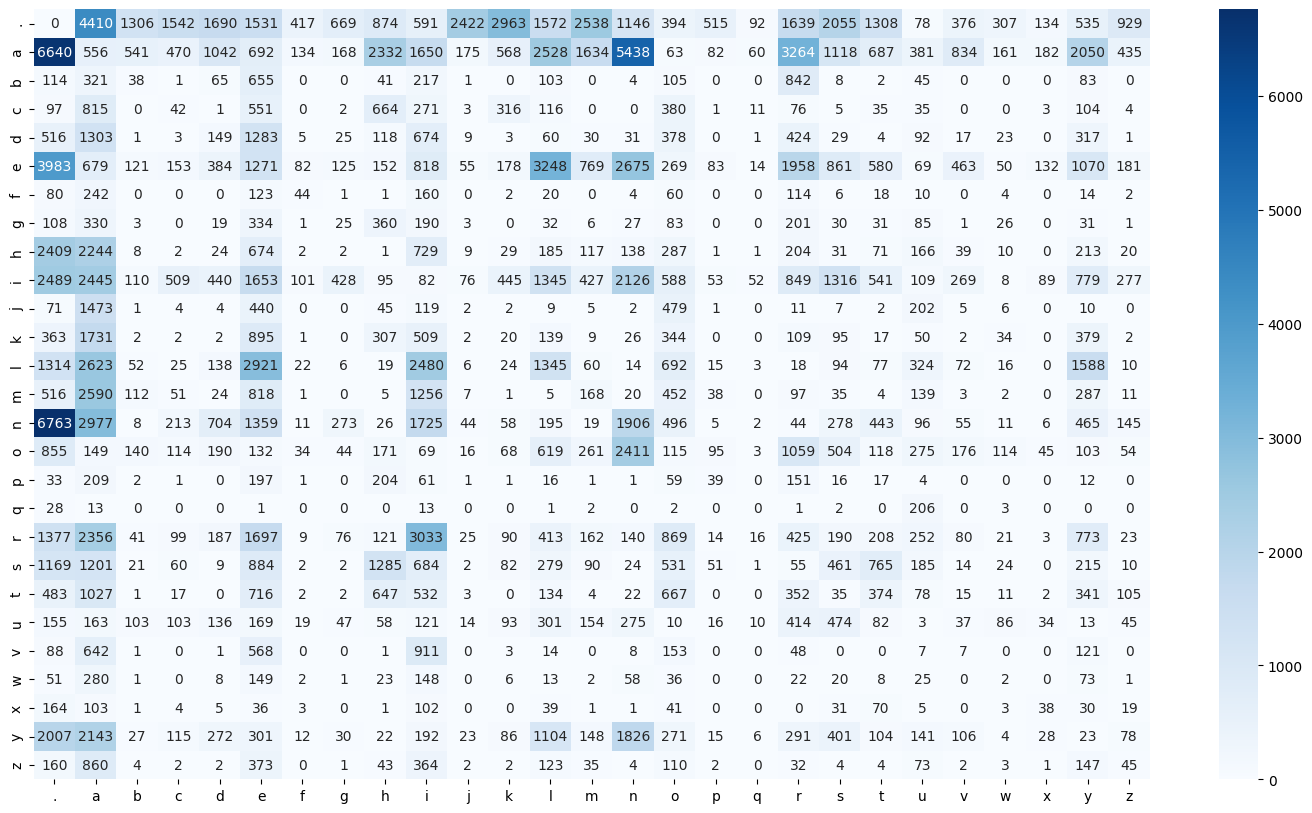

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_df = pd.DataFrame(N, index=characters, columns=characters)
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(_df, annot=True, fmt='d', ax=ax, cmap='Blues')
plt.show()

In [14]:
print(N[character_index['.'], character_index['a']].item())
print(counter[('.', 'a')])

4410
4410


In [15]:
print(N[character_index['n'], character_index['.']].item())
print(N[character_index['a'], character_index['.']].item())

6763
6640


In [16]:
counter[('a', 'j')]

175

---

In [17]:
x = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=torch.float32)
print(x)

row_sums = x.sum(dim=1, keepdim=True) # compute sum of each row
print(row_sums)
x_norm = x / row_sums

print(x_norm)
print(x_norm.sum(dim=1, keepdim=True))


tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor([[10.],
        [26.],
        [42.]])
tensor([[0.1000, 0.2000, 0.3000, 0.4000],
        [0.1923, 0.2308, 0.2692, 0.3077],
        [0.2143, 0.2381, 0.2619, 0.2857]])
tensor([[1.],
        [1.],
        [1.]])


---

In [18]:
P = (N.float() + 1)  # model smoothing
P = P / P.sum(dim=1, keepdim=True)
assert (P.sum(dim=1).round(decimals=5) == 1).all()
print(P.sum(dim=1, keepdim=True))

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])


In [19]:
P.shape

torch.Size([27, 27])

In [20]:
character_index_rev = {i: c for c, i in character_index.items()}
character_index_rev

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

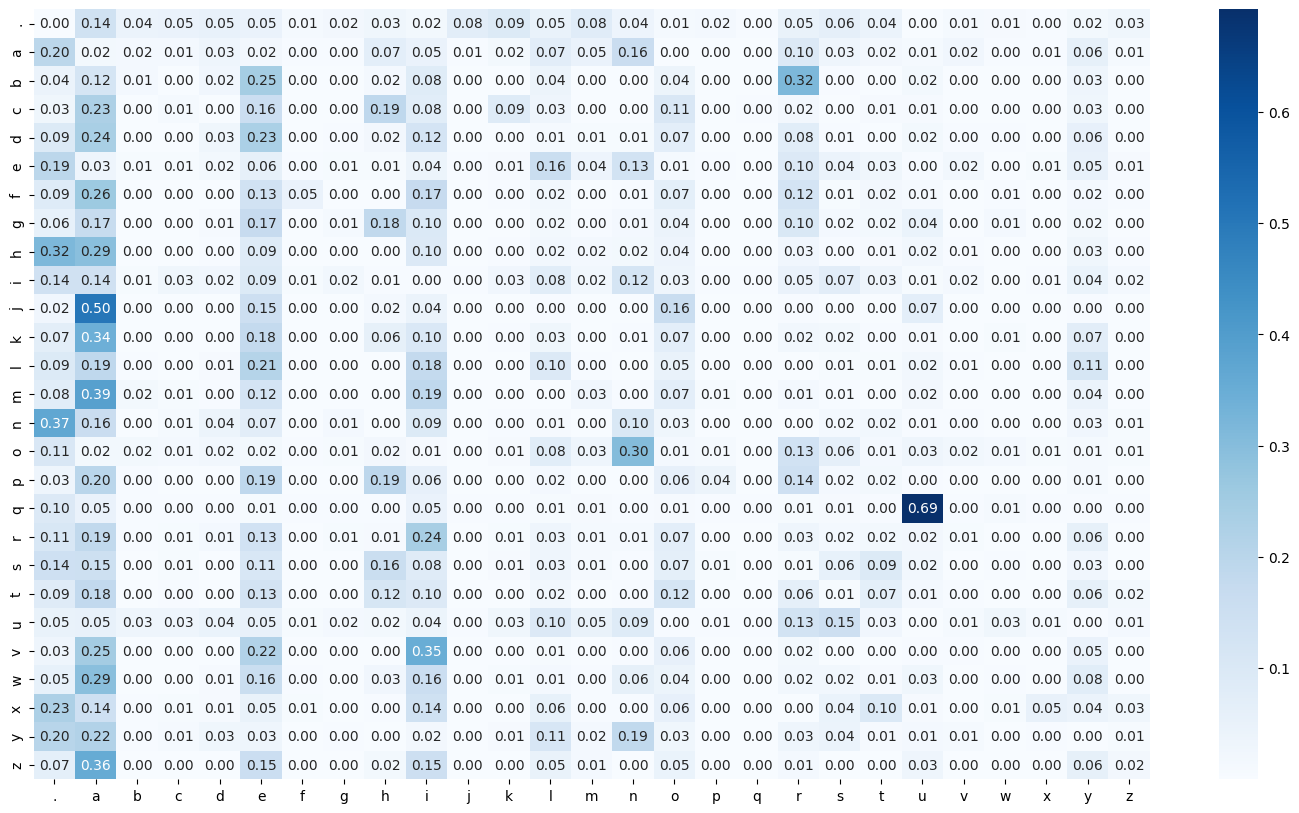

In [21]:
_df = pd.DataFrame(P, index=characters, columns=characters)
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(_df, annot=True, fmt='.2f', ax=ax, cmap='Blues')
plt.show()

# Running Bi-Gram Model

In [22]:
for _ in range(10):
    current_probs = P[0]
    while True:
        next_index = torch.multinomial(current_probs, num_samples=1).item()
        # next_index = torch.randint(low=0, high=27, size=(1,)).item()
        if next_index == 0:
            break
        print(character_index_rev[next_index], end="")
        current_probs = P[next_index]
    print()


zaroeizw
b
poni
brreeisex
sciadanterbeileackylin
liklatardimiyarillusunach
chra
mameksonetlyailyreshaayn
kekath
jahuecehee


In [23]:
counter[('l', 'm')]

60

---

# Evaluating the model

- log-prob; lower probability/likelihood is bad, so negative numbers are bad.. more negative is lower probability
- we want to maximize log-likelihood
- but we want a function we can minimize so we change to positive numbers.

In [24]:
log_likelihood = 0
n = 0
for word in words:
    chars = ['.'] + list(word) + ['.']
    for char_1, char_2 in zip(chars, chars[1:]):
        _p = P[character_index[char_1], character_index[char_2]]
        _log_prob = torch.log(_p)
        log_likelihood += _log_prob.item()
        n += 1
        # print(f"{char_1}{char_2} | {_log_prob:.4f}")
        # counter.update([(char_1, char_2)])

log_likelihood = -log_likelihood
log_likelihood /= n
print(f"Average Log Likelihood: {log_likelihood=}")

Average Log Likelihood: log_likelihood=2.4545768265996495


In [25]:
# we want to calcualte the probability of the dataset which we would get by multiplying all of the 
# probabilities that are generated by the model. Instead we can add the log of the probabilities
# because log is monotonic
import numpy as np
print(0.4 * 0.2 * 0.002)
_log = np.log(0.4) + np.log(0.2) + np.log(0.002)
print(_log)
print(np.exp(_log))

0.00016000000000000004
-8.740336742730447
0.00016


---

# Now using Neural Networks

- still bigram model
- the output of the model is going to be a probability distribution of the next character
- instead of getting probability distributions from the raw counts, we are going to train a NN

## Create Training Set

In [26]:
X, y = [], []

for word in words:
    word = ['.'] + list(word) + ['.']
    for char_1, char_2 in zip(word, word[1:]):
        X.append(character_index[char_1])
        y.append(character_index[char_2])

X = torch.tensor(X)
y = torch.tensor(y)
len(X)

228146

In [27]:
X.dtype

torch.int64

In [28]:
X[0:10]

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22])

In [29]:
y[0:10]

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9])

In [30]:
# we need to give a NN vectors, not numbers, so we need to encode the inputs/outputs via one-hot
# we also need to provide the NN floats, not integers
import torch.nn.functional as F

X_encoded = F.one_hot(X, num_classes=27).float()
print(X_encoded.dtype)
print(X_encoded.shape)

torch.float32
torch.Size([228146, 27])


In [31]:
print(X[0])
print(X_encoded[0])
print(X[1])
print(X_encoded[1])

tensor(0)
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor(5)
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])


---

In [32]:
# first (single) Neuron which takes 27 values as an input to the single neuron.
W = torch.randn((27, 1))  # initial random weights
W

tensor([[-0.1857],
        [-1.8636],
        [ 0.7199],
        [-0.7928],
        [-0.6496],
        [ 1.0079],
        [-1.0741],
        [-0.4084],
        [ 1.0661],
        [-0.4079],
        [ 0.0454],
        [-0.1180],
        [-1.8893],
        [ 0.8363],
        [ 1.1108],
        [ 2.5773],
        [ 0.1005],
        [-0.1061],
        [-0.4558],
        [ 1.2525],
        [-0.6030],
        [ 0.5633],
        [ 0.5582],
        [-1.7868],
        [-1.4316],
        [-0.7431],
        [ 0.9924]])

In [33]:
X[0:2]

tensor([0, 5])

In [34]:
print(X[0:2])  # first two indexes for the characters
print(W)  # weights
print(W[X[0:2]])  # extracting weights associated with first two characters

tensor([0, 5])
tensor([[-0.1857],
        [-1.8636],
        [ 0.7199],
        [-0.7928],
        [-0.6496],
        [ 1.0079],
        [-1.0741],
        [-0.4084],
        [ 1.0661],
        [-0.4079],
        [ 0.0454],
        [-0.1180],
        [-1.8893],
        [ 0.8363],
        [ 1.1108],
        [ 2.5773],
        [ 0.1005],
        [-0.1061],
        [-0.4558],
        [ 1.2525],
        [-0.6030],
        [ 0.5633],
        [ 0.5582],
        [-1.7868],
        [-1.4316],
        [-0.7431],
        [ 0.9924]])
tensor([[-0.1857],
        [ 1.0079]])


In [35]:
# indexes above same as matrix multiplication
assert (W[X[0:2]] == X_encoded[0:2, :] @ W).all().item()
X_encoded[0:2, :] @ W  # @ is matrix multiplication

tensor([[-0.1857],
        [ 1.0079]])

In [36]:
print((X_encoded @ W).shape)
X_encoded @ W  # @ is matrix multiplication; we are seeing the activation values for each of the inputs/examples

torch.Size([228146, 1])


tensor([[-0.1857],
        [ 1.0079],
        [ 0.8363],
        ...,
        [-0.7431],
        [ 0.9924],
        [-1.4316]])

---

In [37]:
# but we want 27 neurons, that each take 27 inputs (fully connected)
W = torch.randn((27, 27))  # initial random weights
W

tensor([[-8.3043e-01, -3.8641e-01, -4.8195e-02,  2.0266e+00,  1.0919e+00,
          3.2832e-01,  7.3881e-01, -6.1366e-01, -1.0898e-01, -2.9532e-01,
          1.1733e+00, -2.1285e-01,  2.0409e-01,  6.1393e-01, -1.5768e-01,
         -6.1766e-01, -1.0707e+00, -4.0928e-01, -4.6411e-01,  2.0320e-01,
         -1.5235e-01, -6.2618e-01,  3.2433e-01,  1.2356e+00, -1.4416e-01,
         -2.7483e-01,  5.5214e-01],
        [-3.6116e-02, -6.4809e-01, -3.2458e-02,  7.8377e-01,  6.3845e-01,
          9.8898e-02, -1.4929e+00, -2.2189e-01,  1.5829e+00, -3.4093e-01,
         -3.5685e-01, -5.9019e-01,  6.7682e-01, -1.0327e+00, -1.0222e+00,
          4.5749e-01,  3.0584e-02, -3.5185e+00, -9.7465e-02,  2.0031e+00,
          8.1257e-01, -1.0240e+00,  4.3462e-01, -5.6921e-01,  6.3804e-01,
         -1.3429e+00, -1.5237e-01],
        [ 4.5385e-01, -9.6970e-01,  1.4681e+00, -2.7169e-01, -1.2513e+00,
          1.8725e-01, -1.2471e+00, -6.4953e-01,  1.3988e+00, -2.1475e-01,
         -1.0710e+00, -4.6688e-01, -1.15

In [38]:
(X_encoded @ W).shape

torch.Size([228146, 27])

In [39]:
X_encoded @ W

tensor([[-0.8304, -0.3864, -0.0482,  ..., -0.1442, -0.2748,  0.5521],
        [ 0.1143, -1.3789, -0.2515,  ...,  0.0037, -1.6695,  1.1813],
        [ 0.4824, -1.1905,  0.5960,  ..., -0.5174,  1.9428, -1.1816],
        ...,
        [ 1.4887,  0.4914, -0.9443,  ...,  0.7571, -1.3587, -0.6416],
        [ 1.5988,  1.2178, -0.3211,  ...,  0.2954, -0.2733, -0.5701],
        [-0.5343, -0.5866,  1.5399,  ...,  0.8098,  0.3132, -0.6484]])

In [40]:
# example: gives the firing rate of the fourteen neuron in the fourth input
(X_encoded @ W)[3, 13]

tensor(-0.0176)

In [41]:
X_encoded[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
W[:, 13:14]

tensor([[ 0.6139],
        [-1.0327],
        [-2.5451],
        [ 1.3238],
        [ 1.2528],
        [-2.7274],
        [ 1.2969],
        [ 0.3415],
        [-1.3932],
        [ 0.4486],
        [ 0.5857],
        [ 0.7954],
        [-1.0510],
        [-0.0176],
        [ 0.4436],
        [ 0.1659],
        [ 0.2909],
        [ 1.0848],
        [-0.4286],
        [-0.7313],
        [-0.0556],
        [-0.7765],
        [-2.3694],
        [-0.7731],
        [-1.5681],
        [-1.5753],
        [-0.8150]])

In [43]:
X_encoded[3] @ W[:, 13:14]

tensor([-0.0176])

In [44]:
W[:, 13:14]

tensor([[ 0.6139],
        [-1.0327],
        [-2.5451],
        [ 1.3238],
        [ 1.2528],
        [-2.7274],
        [ 1.2969],
        [ 0.3415],
        [-1.3932],
        [ 0.4486],
        [ 0.5857],
        [ 0.7954],
        [-1.0510],
        [-0.0176],
        [ 0.4436],
        [ 0.1659],
        [ 0.2909],
        [ 1.0848],
        [-0.4286],
        [-0.7313],
        [-0.0556],
        [-0.7765],
        [-2.3694],
        [-0.7731],
        [-1.5681],
        [-1.5753],
        [-0.8150]])

In [45]:
print(X_encoded[3])
print(W[:, 13])

(X_encoded[3] * W[:, 13]).sum()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([ 0.6139, -1.0327, -2.5451,  1.3238,  1.2528, -2.7274,  1.2969,  0.3415,
        -1.3932,  0.4486,  0.5857,  0.7954, -1.0510, -0.0176,  0.4436,  0.1659,
         0.2909,  1.0848, -0.4286, -0.7313, -0.0556, -0.7765, -2.3694, -0.7731,
        -1.5681, -1.5753, -0.8150])


tensor(-0.0176)

---

In [46]:
W.shape

torch.Size([27, 27])

In [47]:
# our input layer will be a one-hot encoded vector 27 values (each character of alphabet + '.')
# we'll have an initial layer of 27 neurons, and each neuron receives 27 inputs (fully connected)
(X_encoded @ W).shape

torch.Size([228146, 27])

In [48]:
(X_encoded @ W)[0]

tensor([-0.8304, -0.3864, -0.0482,  2.0266,  1.0919,  0.3283,  0.7388, -0.6137,
        -0.1090, -0.2953,  1.1733, -0.2129,  0.2041,  0.6139, -0.1577, -0.6177,
        -1.0707, -0.4093, -0.4641,  0.2032, -0.1524, -0.6262,  0.3243,  1.2356,
        -0.1442, -0.2748,  0.5521])

In [49]:
(X_encoded @ W)

tensor([[-0.8304, -0.3864, -0.0482,  ..., -0.1442, -0.2748,  0.5521],
        [ 0.1143, -1.3789, -0.2515,  ...,  0.0037, -1.6695,  1.1813],
        [ 0.4824, -1.1905,  0.5960,  ..., -0.5174,  1.9428, -1.1816],
        ...,
        [ 1.4887,  0.4914, -0.9443,  ...,  0.7571, -1.3587, -0.6416],
        [ 1.5988,  1.2178, -0.3211,  ...,  0.2954, -0.2733, -0.5701],
        [-0.5343, -0.5866,  1.5399,  ...,  0.8098,  0.3132, -0.6484]])

In [50]:
(X_encoded @ W).exp()  # all numbers are now positive

tensor([[0.4359, 0.6795, 0.9529,  ..., 0.8657, 0.7597, 1.7370],
        [1.1210, 0.2518, 0.7777,  ..., 1.0037, 0.1883, 3.2587],
        [1.6199, 0.3041, 1.8149,  ..., 0.5960, 6.9785, 0.3068],
        ...,
        [4.4314, 1.6345, 0.3890,  ..., 2.1320, 0.2570, 0.5264],
        [4.9472, 3.3797, 0.7254,  ..., 1.3437, 0.7609, 0.5654],
        [0.5861, 0.5562, 4.6641,  ..., 2.2474, 1.3679, 0.5229]])

In [51]:
logits = X_encoded @ W  # logits i.e. log counts
counts = logits.exp()  # equivalent to our "N" matrix of counts above
prob = counts / counts.sum(dim=1, keepdims=True)
assert (prob.sum(dim=1).round(decimals=4) == 1).all().item()
print(prob.shape)

# for each one of our examples, we now have a row that came out of a NN
# that we can interpret as a probability distribution; i.e. the NN assignment for how likely each
# one of the characters are to come next
# additionally, all of these operations are differentiable, so we can backpropegate through and 
# use gradient descent
prob

torch.Size([228146, 27])


tensor([[0.0111, 0.0173, 0.0243,  ..., 0.0221, 0.0194, 0.0443],
        [0.0435, 0.0098, 0.0302,  ..., 0.0390, 0.0073, 0.1265],
        [0.0297, 0.0056, 0.0333,  ..., 0.0109, 0.1279, 0.0056],
        ...,
        [0.0846, 0.0312, 0.0074,  ..., 0.0407, 0.0049, 0.0101],
        [0.1280, 0.0874, 0.0188,  ..., 0.0348, 0.0197, 0.0146],
        [0.0102, 0.0097, 0.0816,  ..., 0.0393, 0.0239, 0.0091]])

---

In [52]:
generator = torch.Generator().manual_seed(2147483647)
# 27 neurons, that each take 27 inputs (fully connected)
W = torch.randn((27, 27), generator=generator)  # initial random weights
W.shape

torch.Size([27, 27])

In [53]:
# we need to give a NN vectors, not numbers, so we need to encode the inputs/outputs via one-hot
# we also need to provide the NN floats, not integers
import torch.nn.functional as F

X_encoded = F.one_hot(X, num_classes=27).float()
print(X_encoded.dtype)
print(X_encoded.shape)

torch.float32
torch.Size([228146, 27])


In [54]:
# forward pass

logits = X_encoded @ W  # logits i.e. log counts

# softmax; makes NN output probabilities
counts = logits.exp()  # equivalent to our "N" matrix of counts above
prob = counts / counts.sum(dim=1, keepdims=True)
assert (prob.sum(dim=1).round(decimals=4) == 1).all().item()
print(prob.shape)



# for each one of our examples, we now have a row that came out of a NN
# that we can interpret as a probability distribution; i.e. the NN assignment for how likely each
# one of the characters are to come next
# additionally, all of these operations are differentiable, so we can backpropegate through and 
# use gradient descent
prob

torch.Size([228146, 27])


tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]])

In [55]:
# for the first example

print(X[0])
print(y[0])
print(prob[0])

p_answer = prob[0, y[0]]
print(f"Probability of the the true target i.e. answer assigned by model: {p_answer.item()}")
print(f"Log-Likelihood: {p_answer.log()}")
print(f"Negative Log-Likelihood: {-p_answer.log()}")


tensor(0)
tensor(5)
tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
Probability of the the true target i.e. answer assigned by model: 0.012286253273487091
Log-Likelihood: -4.3992743492126465
Negative Log-Likelihood: 4.3992743492126465


---

# Single Pass

## Foward Pass

In [56]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
W.shape

torch.Size([27, 27])

In [58]:
# forward pass 
xenc = F.one_hot(X, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# loss calculated only from first 5 examples
loss = -probs[torch.arange(5), y[0:5]].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [59]:
print(loss.item())

3.7693049907684326


## Backward Pass

In [60]:
W.grad

In [61]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [62]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [63]:
W.data += -0.1 * W.grad

---

In [64]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = character_index[ch1]
    ix2 = character_index[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [65]:
torch.arange(num)

tensor([     0,      1,      2,  ..., 228143, 228144, 228145])

In [76]:
# gradient descent
for k in range(200):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # I don't know why, but the line below crashes (using ':') but it seems like it should be equivalent
    # loss = -probs[:, ys].log().mean() + 0.01*(W**2).mean()
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    if k % 100 == 0:
        print(loss.item())
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    # update
    W.data += -50 * W.grad

print(loss.item())

2.480423927307129
2.480417013168335
2.480412483215332


---

In [103]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=None).item()
    out.append(character_index_rev[ix])
    if ix == 0:
      break
  print(''.join(out))

ahuvirin.
kryanaveta.
at.
eeeegin.
dd.


---